# CLUSTERIZAÇÃO VARIÁVEIS SINTÉTICAS DE NÍVEL DE DESENVOLVIMENTO DO MUNICÍPIO

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - CONTAGEM_CP_ANO_MUN


In [1]:
import pandas as pd
df = pd.read_csv('df_final_cp+cs-cs.csv')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO
0,2023,4644301,7885
1,2023,4637104,1569
2,2023,4647801,1219
3,2023,4647801,1219
4,2023,4647801,1219
...,...,...,...
85176660,1903,9430800,921
85176661,1901,9430800,8927
85176662,1901,9430800,8927
85176663,1901,6912500,6645


In [2]:
# CONTAGEM_CP_ANO_MUN
# Contagem de quantos CNAEs novos por município: filtrar:
# ano > município > contagem CNAEs existentes
# Quanto mais CNAEs (maior contagem), mais desenvolvido será o município no ano avaliado

# Primeiro, criamos um DataFrame temporário com a contagem de 'CNAE_FISCAL_PRINCIPAL' por 'ANO' e 'MUNICÍPIO'
df_contagem_por_municipio = df.groupby(['DATA_DE_INÍCIO_ATIVIDADE', 'MUNICÍPIO'])['CNAE_FISCAL_PRINCIPAL'].count().reset_index(name='CONTAGEM_CP_ANO_MUN')

# Em seguida, fundimos os dados de contagem ao DataFrame original usando 'ANO' e 'MUNICÍPIO' como chaves de junção
df = df.merge(df_contagem_por_municipio, on=['DATA_DE_INÍCIO_ATIVIDADE', 'MUNICÍPIO'], how='left')
df

,DATA_DE_INÍCIO_ATIVIDADE,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_ANO_MUN
0,2023,4644301,7885,5706
1,2023,4637104,1569,1229
2,2023,4647801,1219,12740
3,2023,4647801,1219,12740
4,2023,4647801,1219,12740
...,...,...,...,...
85176660,1903,9430800,921,2
85176661,1901,9430800,8927,2
85176662,1901,9430800,8927,2
85176663,1901,6912500,6645,1


In [3]:
# EXCLUINDO AS INFORMAÇÕES NÃO NECESSÁRIAS AO MODELO:
df = df.drop(['DATA_DE_INÍCIO_ATIVIDADE'], axis=1)
df

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_ANO_MUN
0,4644301,7885,5706
1,4637104,1569,1229
2,4647801,1219,12740
3,4647801,1219,12740
4,4647801,1219,12740
...,...,...,...
85176660,9430800,921,2
85176661,9430800,8927,2
85176662,9430800,8927,2
85176663,6912500,6645,1


In [5]:
dados_cluster = df[['CNAE_FISCAL_PRINCIPAL', 'MUNICÍPIO', 'CONTAGEM_CP_ANO_MUN']]
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_ANO_MUN
0,4644301,7885,5706
1,4637104,1569,1229
2,4647801,1219,12740
3,4647801,1219,12740
4,4647801,1219,12740
...,...,...,...
85176660,9430800,921,2
85176661,9430800,8927,2
85176662,9430800,8927,2
85176663,6912500,6645,1


In [6]:
# Realize a amostragem aleatória simples com 0,01% dos dados
dados_cluster = dados_cluster.sample(frac=0.0001, random_state=42)
dados_cluster

,CNAE_FISCAL_PRINCIPAL,MUNICÍPIO,CONTAGEM_CP_ANO_MUN
13371777,4781400,9701,185614
17844177,1821100,5403,41939
16910876,8230001,6377,14124
49398932,8130300,2913,1321
23025343,5620104,3215,170
...,...,...,...
21782925,4744099,7735,1227
68496831,121101,6225,138
60948296,4929901,6001,116703
56463131,6203100,7107,259471


In [7]:
# transformações necessárias para aplicação do algoritmo
# Converter as colunas "MUNICÍPIO" e "CNAE_FISCAL_PRINCIPAL" em string
dados_cluster["MUNICÍPIO"] = dados_cluster["MUNICÍPIO"].astype(str)
dados_cluster["CNAE_FISCAL_PRINCIPAL"] = dados_cluster["CNAE_FISCAL_PRINCIPAL"].astype(str)

# Agrupar o DataFrame pelos campos desejados
grupo = dados_cluster.groupby(["CONTAGEM_CP_ANO_MUN", "MUNICÍPIO", "CNAE_FISCAL_PRINCIPAL"]).size().reset_index(name="Contagem")

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dados_cluster_scaled = scaler.fit_transform(grupo)

pca = PCA(n_components=2)  # k é o número de componentes principais desejados
X = pca.fit_transform(dados_cluster_scaled)

componentes_principais = pca.components_
variancia_explicada = pca.explained_variance_ratio_


Número de clusters encontrados: 8


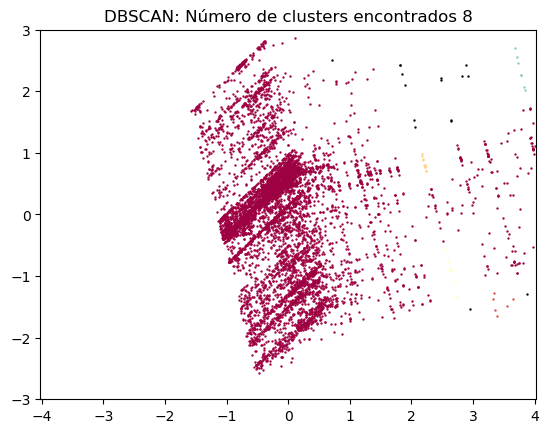

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# Aplicando o DBSCAN
eps = 0.3  # Parâmetro de distância máxima entre os pontos do mesmo cluster
min_samples = 5  # Número mínimo de pontos para formar um cluster
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X)

# Obtendo a quantidade de clusters encontrados
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print(f"Número de clusters encontrados: {n_clusters}")

# Criando um gráfico colorido dos clusters
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Ruído é exibido em preto
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], c=[col], marker='o', s=0.5)

plt.title('DBSCAN: Número de clusters encontrados {}'.format(n_clusters))

# Centralizar o gráfico na origem
plt.axis('equal')
plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.show()


# CLUSTERIZAÇÃO VARIÁVEIS SINTÉTICAS DE NÍVEL DE DESENVOLVIMENTO DO MUNICÍPIO

CNAE_FISCAL_PRINCIPAL - MUNICÍPIO - CONTAGEM_CP_ANO_MUN

Tendo em vista a utilização de apenas 0,001% dos dados devido às limitações de poder computacional existentes, o gráfico apresentado possui distribuição esparça e uniforme próxima ao eixo "y". Os 3 clusters encontrados não apresentaram resultados conclusivos ao formato dos dados. O posicionamento dos dados indica uma curva de crescimento acentuado próximo ao eixo, o que pode indicar que se comparado ao primeiro gráfico, os dados .